In [28]:
import pandas as pd
import numpy as np

In [29]:
df=pd.read_csv('/Users/pinakshome/Downloads/filename.csv')

In [30]:
df.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,...,86.1,87.1,88.1,89.1,90.1,91.1,92.1,93.1,94.1,95.1
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,...,12.478960,-30.068916,-47.913704,14.714819,-17.241796,6.486742,26.456944,63.701756,-17.887812,21.516744
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,...,4.830286,19.611316,-35.900315,45.733020,-2.857667,5.916835,82.456647,34.427445,-0.153919,83.436931
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,...,51.079300,-11.944415,-51.070303,12.397092,-19.068652,-5.625119,48.529738,48.813838,-6.016323,10.582177
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,...,22.016933,8.856641,-6.845017,22.816606,0.418036,-18.978344,9.303708,41.359691,4.616390,32.863498
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,...,-3.956322,-13.591865,-26.024713,13.573344,-10.809352,-2.419421,35.918895,36.435134,-10.428500,16.641600


In [31]:
df.columns.tolist()

['freq_qid1',
 'freq_qid2',
 'q1len',
 'q2len',
 'q1_n_words',
 'q2_n_words',
 'word_Common',
 'word_Total',
 'word_share',
 'freq_q1+q2',
 'freq_q1-q2',
 'cwc_min',
 'cwc_max',
 'csc_min',
 'csc_max',
 'ctc_min',
 'ctc_max',
 'last_word_eq',
 'first_word_eq',
 'abs_len_diff',
 'mean_len',
 'token_set_ratio',
 'token_sort_ratio',
 'fuzz_ratio',
 'fuzz_partial_ratio',
 'longest_substr_ratio',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',

In [32]:
df1=pd.read_csv('/Users/pinakshome/Downloads/quora-question-pairs/train.csv')

In [33]:
y=df1['is_duplicate']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.3)

In [35]:
import xgboost as xgb

params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.65114	valid-logloss:0.65114
[10]	train-logloss:0.58887	valid-logloss:0.58875
[20]	train-logloss:0.54357	valid-logloss:0.54347
[30]	train-logloss:0.50937	valid-logloss:0.50924
[40]	train-logloss:0.48377	valid-logloss:0.48362
[50]	train-logloss:0.46353	valid-logloss:0.46333
[60]	train-logloss:0.44738	valid-logloss:0.44715
[70]	train-logloss:0.43465	valid-logloss:0.43441
[80]	train-logloss:0.42422	valid-logloss:0.42396
[90]	train-logloss:0.41552	valid-logloss:0.41524
[100]	train-logloss:0.40835	valid-logloss:0.40808
[110]	train-logloss:0.40226	valid-logloss:0.40199
[120]	train-logloss:0.39723	valid-logloss:0.39695
[130]	train-logloss:0.39295	valid-logloss:0.39269
[140]	train-logloss:0.38941	valid-logloss:0.38917
[150]	train-logloss:0.38619	valid-logloss:0.38595
[160]	train-logloss:0.38333	valid-logloss:0.38312
[170]	train-logloss:0.38081	valid-logloss:0.38062
[180]	train-logloss:0.37879	valid-logloss:0.37866
[190]	train-logloss:0.37686	valid-logloss:0.37680
[200]	train

In [36]:
from sklearn.metrics import log_loss
print("The test log loss is:",log_loss(y_test, predict_y, labels=[0,1], eps=1e-15))

The test log loss is: 0.35398671734427034


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2898: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


In [37]:
# Get feature importance
importance = bst.get_score(importance_type='weight')  # You can change to 'gain' or 'cover'

# Convert importance dictionary into a list of tuples and sort them
importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)

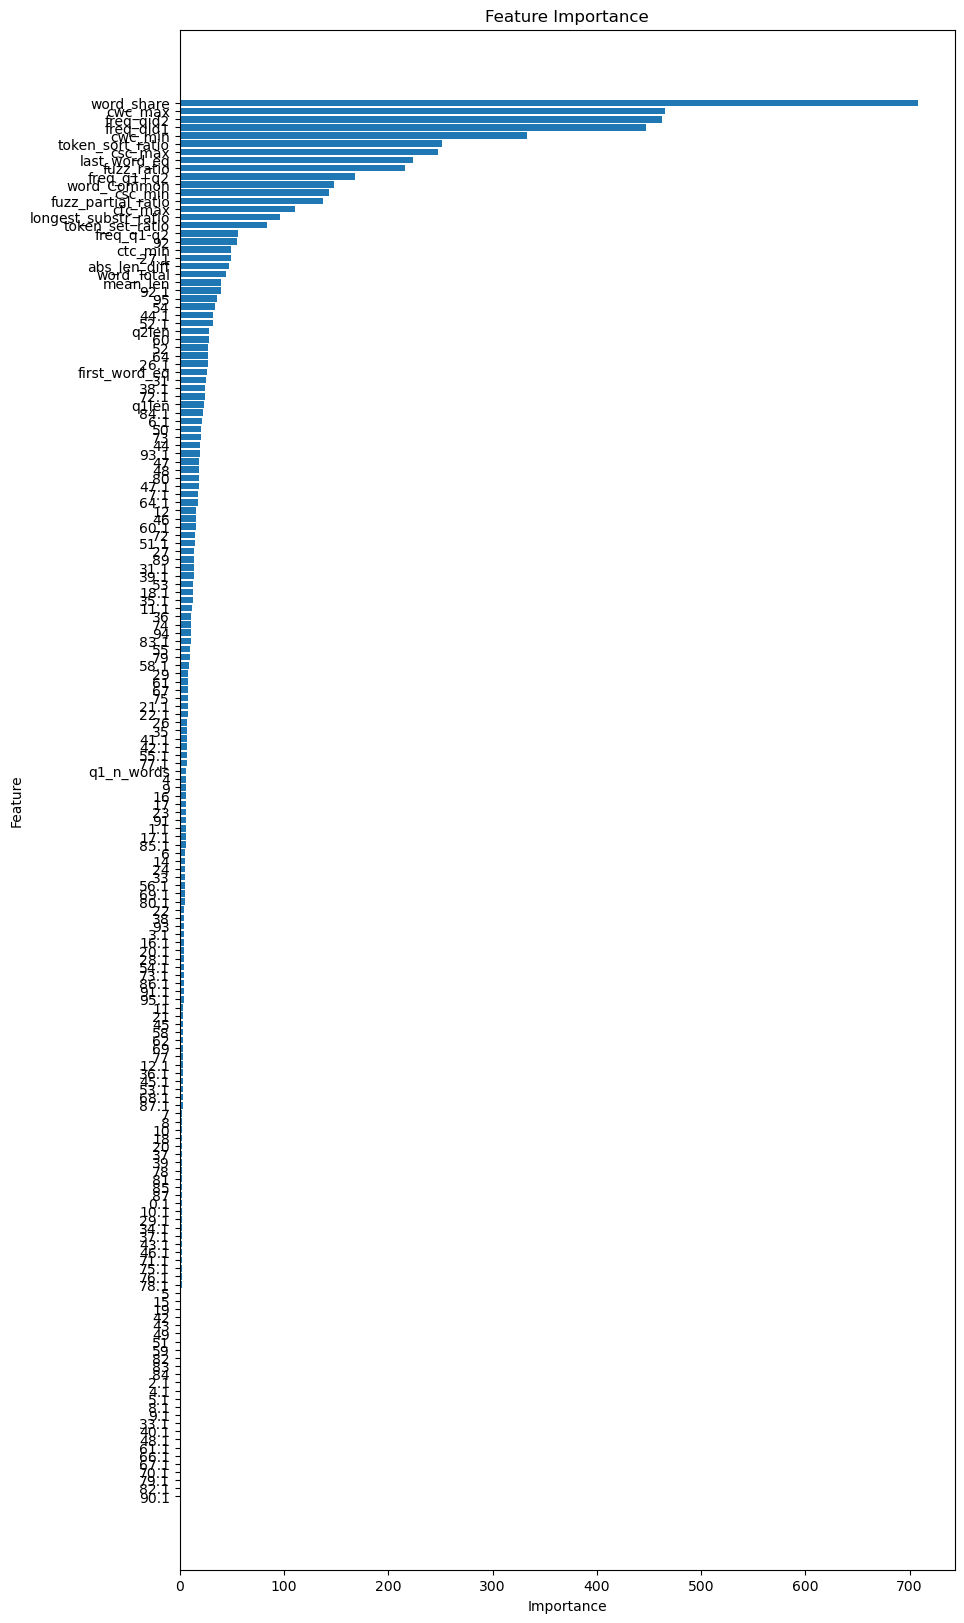

In [38]:
import matplotlib.pyplot as plt

# Unzip the feature importance items
features, importance_values = zip(*importance_sorted)

# Plotting
plt.figure(figsize=(10, 20))
plt.barh(range(len(importance_values)), importance_values, tick_label=features)  # Rotates x-axis labels to 45 degrees
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


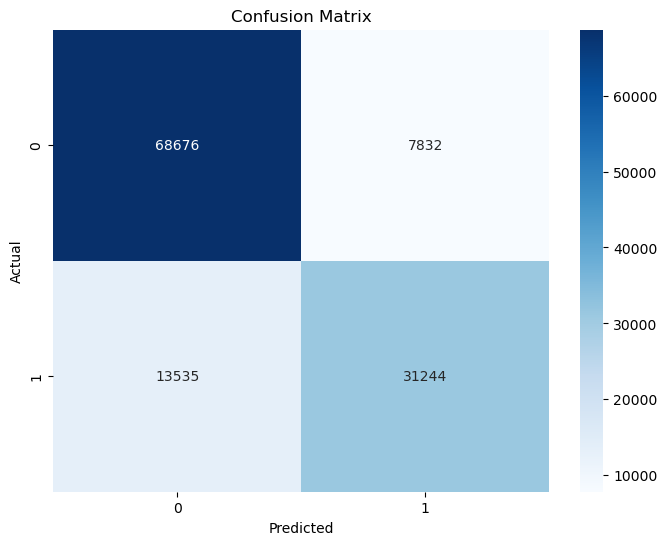

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming predict_y and y_test are available from your previous code

# Convert probabilities to binary predictions
predicted_labels = np.where(predict_y > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Assuming binary classification, but you can adjust the labels based on your dataset
labels = ['0', '1']

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()